<div style="text-align: right">hidekuno@gmail.com<br>2021-02-28</div> 

# SICP 図形言語
   https://sicp.iijlab.net/fulltext/x224.html を参考にpythonで実装

## matplot

In [1]:
import matplotlib.pyplot as plt
from math import cos
from math import sin
from math import pi

def draw_init():
    plt.axes().set_aspect('equal')
    plt.ylim([1, 0])
    plt.axis('off')

def draw_line(s,e):
    plt.plot([xcor_vect(s), xcor_vect(e)], [ycor_vect(s), ycor_vect(e)], 'black',linewidth=0.8)

## フレームの構築子
$$
\mathrm{MakeFrame}(origin,edge1, edge2) =
\mathrm{MakeFrame}(MakeVect(x_1,y_1),MakeVect(x_2,y_2), MakeVect(x_3,y_3))
$$

In [2]:
def make_frame(origin, edge1, edge2): return (origin, edge1, edge2)
def origin_frame(frame):return frame[0]
def edge1_frame(frame): return frame[1]
def edge2_frame(frame): return frame[2]

## ベクトルの構築子
$$
\mathrm{MakeVect}(x,y) =
\begin{cases}
 x: \quad 0 \leqq x \leqq 1.0 \\
 y: \quad 0 \leqq y \leqq 1.0 \\
\end{cases}
$$

In [3]:
def make_vect(x, y): return (x, y)
def xcor_vect(v): return v[0]
def ycor_vect(v): return v[1]

## ベクトルの演算子
##### ベクタの加算 
* $(x_1,y_1) + (x_2,y_2) = (x_1 + x_2, y_1 + y_2)$

#####  ベクタの減算 
* $(x_1,y_1) - (x_2,y_2) = (x_1 - x_2, y_1 - y_2)$

##### スカラーによる乗算 
* $s*(x,y) = (s*x, s*y)$

In [4]:
def add_vect(v1, v2):
    return make_vect(xcor_vect(v1) + xcor_vect(v2),ycor_vect(v1) + ycor_vect(v2))

def sub_vect(v1, v2):
    return make_vect(xcor_vect(v1) - xcor_vect(v2),ycor_vect(v1) - ycor_vect(v2))

def scale_vect(s, v):
    return make_vect(s * xcor_vect(v), s * ycor_vect(v))

## フレーム内へベクタを写像

$(x_a, y_a) = Origin(Frame) + x*Edge_1(Frame) + y*Edge_2(Frame)$ = $(x_0, y_0) + s_x*(x_1, y_1) + s_y*(x_2, y_2$)

$$
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
=
\left[\begin{array}{c}
    x_0 \\
    y_0
\end{array}\right]
+
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
*
s_x
+
\left[\begin{array}{c}
    x_2 \\
    y_2
\end{array}\right]
*
s_y
$$


In [5]:
def frame_coord_map(frame):
    def _lambda(v):
        return add_vect(origin_frame(frame),
                     add_vect(scale_vect(xcor_vect(v), edge1_frame(frame)),
                              scale_vect(ycor_vect(v), edge2_frame(frame))))
    return _lambda

## 新しいペインタの構築子
#### ペインタとフレームの変換法の情報をとり, 新しいペインタを作る

In [6]:
def transform_painter(painter, origin, corner1, corner2):
    def _lambda(frame):
        m = frame_coord_map(frame)
        new_origin = m(origin)
        return painter(make_frame(new_origin,
                                  sub_vect(m(corner1),new_origin),
                                  sub_vect(m(corner2),new_origin)))
    return _lambda

## ペインタの応用
##### 垂直反転
$$
\boldsymbol{v} =
\left[\begin{array}{c}
    0.0 & 1.0 \\
    1.0 & 1.0 \\
    0.0 & 0.0 \\
\end{array}\right]
$$

##### 水平反転
$$
\boldsymbol{v} =
\left[\begin{array}{c}
    1.0 & 0.0 \\
    0.0 & 0.0 \\
    1.0 & 1.0 \\
\end{array}\right]
$$

##### 90度回転
$$
\boldsymbol{v} =
\left[\begin{array}{c}
    1.0 & 0.0 \\
    1.0 & 1.0 \\
    0.0 & 0.0 \\
\end{array}\right]
$$

##### 270度回転
$$
\boldsymbol{v} =
\left[\begin{array}{c}
    0.0 & 1.0 \\
    0.0 & 0.0 \\
    1.0 & 1.0 \\
\end{array}\right]
$$

##### 右上の四半分に画像を縮める
$$
\boldsymbol{v} =
\left[\begin{array}{c}
    0.5 & 0.5 \\
    1.0 & 0.5 \\
    0.5 & 0.0 \\
\end{array}\right]
$$

In [7]:
def flip_vert(painter):
      return transform_painter(painter,
                               make_vect(0.0, 1.0),
                               make_vect(1.0, 1.0),
                               make_vect(0.0, 0.0))

def flip_horiz(painter):
      return transform_painter(painter,
                               make_vect(1.0, 0.0),
                               make_vect(0.0, 0.0),
                               make_vect(1.0, 1.0))

def rotate90(painter):
      return transform_painter(painter,
                               make_vect(1.0, 0.0),
                               make_vect(1.0, 1.0),
                               make_vect(0.0, 0.0))

def rotate270(painter):
      return transform_painter(painter,
                               make_vect(0.0, 1.0),
                               make_vect(0.0, 0.0),
                               make_vect(1.0, 1.0))

def shrink_to_upper_right(painter):
      return transform_painter(painter,
                               make_vect(0.5, 0.5),
                               make_vect(1.0, 0.5),
                               make_vect(0.5, 0.0))

## ペインタの組合せ

In [8]:
def beside(painter1, painter2):
    split_point = make_vect(0.5, 0.0)
    paint_left = transform_painter(painter1,
                                   make_vect(0.0, 0.0),
                                   split_point,
                                   make_vect(0.0, 1.0))
    paint_right = transform_painter(painter2,
                                    split_point,
                                    make_vect(1.0, 0.0),
                                    make_vect(0.5, 1.0))
    def _lambda(frame):
        paint_left(frame)
        paint_right(frame)

    return _lambda

def below(painter1, painter2): return rotate90(beside(rotate270(painter1), rotate270(painter2)))

def up_split(painter, n):
    if n == 0:
        return painter
    else:
        smaller = up_split(painter, n - 1)
        return below(painter, beside(smaller, smaller))
    
def right_split(painter, n):
    if n == 0:
        return painter
    else:
        smaller = right_split(painter, n - 1)
        return beside(painter, below(smaller, smaller))    
    
def corner_split(painter, n):
    if n == 0:
        return painter
    else:
        up = up_split(painter, n - 1)
        right = right_split(painter, n - 1)
        top_left = beside(up, up)
        bottom_right = below(right, right)
        corner = corner_split(painter, n - 1)

        return beside(below(painter, top_left),
                    below(bottom_right, corner))

def square_limit(painter, n):
    quarter = corner_split(painter, n)
    half = beside(flip_horiz(quarter), quarter)
    return below(flip_vert(half), half)

## 線分の構築子と描画処理
$$
\mathrm{MakeSegment}(start, end) =
\mathrm{MakeSegment}(MakeVect(x_1,y_1),MakeVect(x_2,y_2))
$$

In [9]:
def make_segment(start, end): return (start, end)
def start_segment(seg): return seg[0]
def end_segment(seg): return seg[1]

def segments_painter(segment_list):
    def _lambda(frame):
        m = frame_coord_map(frame)
        for segment in segment_list:
            draw_line(m(start_segment(segment)), m(end_segment(segment)))
    return _lambda

## 描画データ

In [10]:
def wave():
    segments = (
        make_segment(make_vect(0.35, 0.15) ,make_vect(0.4, 0)),
        make_segment(make_vect(0.65, 0.15) ,make_vect(0.6, 0)),
        make_segment(make_vect(0.35, 0.15) ,make_vect(0.4, 0.35)),
        make_segment(make_vect(0.65, 0.15) ,make_vect(0.6, 0.35)),
        make_segment(make_vect(0.6, 0.35)  ,make_vect(0.75, 0.35)),
        make_segment(make_vect(0.4, 0.35)  ,make_vect(0.3, 0.35)),
        make_segment(make_vect(0.75, 0.35) ,make_vect(1, 0.65)),
        make_segment(make_vect(0.6, 0.55)  ,make_vect(1, 0.85)),
        make_segment(make_vect(0.6, 0.55)  ,make_vect(0.75, 1)),
        make_segment(make_vect(0.5, 0.7)   ,make_vect(0.6, 1)),
        make_segment(make_vect(0.3, 0.35)  ,make_vect(0.15, 0.4)),
        make_segment(make_vect(0.3, 0.4)   ,make_vect(0.15, 0.6)),
        make_segment(make_vect(0.15, 0.4)  ,make_vect(0, 0.15)),
        make_segment(make_vect(0.15, 0.6)  ,make_vect(0, 0.35)),
        make_segment(make_vect(0.3, 0.4)   ,make_vect(0.35, 0.5)),
        make_segment(make_vect(0.35, 0.5)  ,make_vect(0.25, 1)),
        make_segment(make_vect(0.5, 0.7)   ,make_vect(0.4, 1)),)
    return segments_painter(segments)

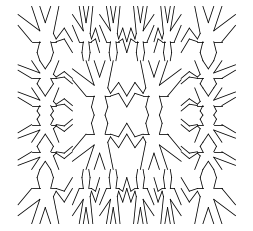

In [11]:
draw_init()
frame = make_frame(make_vect(0, 0),make_vect(1, 0),make_vect(0, 1))

#beside(wave(),wave())(frame)
#below(wave(),wave())(frame)
#up_split(wave(),1)(frame)
#right_split(wave(),1)(frame)
#corner_split(wave(),1)(frame)
square_limit(wave(),1)(frame)

## Koch曲線

##### a. 線分 [(x0,y0), (x1,y1)] を 1:2 に内分
$$
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
=
\left[\begin{array}{c}
    (x_0 * 2) + x_1 \\
    (y_0 * 2) + y_1
\end{array}\right]
*
\frac{1}{3}
$$

##### b. 線分 [(x0,y0), (x1,y1)] を 2:1 に内分
$$
\left[\begin{array}{c}
    x_b \\
    y_b
\end{array}\right]
=
\left[\begin{array}{c}
    (x_1 * 2) + x_0 \\
    (y_1 * 2) + y_0
\end{array}\right]
*
\frac{1}{3}
$$

#####  c. aとbより60度回転させる
$$
\left[\begin{array}{c}
    x_c \\
    y_c
\end{array}\right]
=
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
+
\left[\begin{array}{c}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
\end{array}\right]
\left[\begin{array}{c}
    (x_b - x_a) \\
    (y_b - y_a)
\end{array}\right]
$$


In [12]:
def koch(n):
    def _lambda(frame):
        cs = cos((pi * 60) / 180)
        sn = sin((pi * 60) / 180)
        m =  frame_coord_map(frame)

        def koch_iter(v0, v1, c):
            if c > 1:
                va = scale_vect(1/3, add_vect(scale_vect(2, v0), v1))
                vb = scale_vect(1/3, add_vect(scale_vect(2, v1), v0))
                vc = frame_coord_map(make_frame(va, make_vect(cs,sn),make_vect(-sn,cs)))(sub_vect(vb,va))

                koch_iter(v0, va, c - 1)
                koch_iter(va, vc, c - 1)
                koch_iter(vc, vb, c - 1)
                koch_iter(vb, v1, c - 1)
            else:
                draw_line(m(v0), m(v1))

        koch_iter(make_vect(0.35902777777777783, 0.15636550712410902), 
                  make_vect(0.04722222222222222, 0.6964285714285714), n)
        koch_iter(make_vect(0.04722222222222222, 0.6964285714285714), 
                  make_vect(0.6708333333333333, 0.6964285714285714), n)
        koch_iter(make_vect(0.6708333333333333, 0.6964285714285714), 
                  make_vect(0.35902777777777783, 0.15636550712410902), n)
    return _lambda

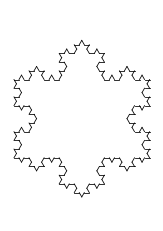

In [13]:
draw_init()
frame = make_frame(make_vect(0, 0),make_vect(1, 0),make_vect(0, 1))
transform_painter(koch(4),
                  make_vect(0.0, 0.0),
                  make_vect(1.0, 0.0),
                  make_vect(0.0, 1.0))(frame)

## ツリーカーブ

#####  右方向(回転)
$$
\left[\begin{array}{c}
    x_a \\
    y_a
\end{array}\right]
=
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
+
\left[\begin{array}{c}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
\end{array}\right]
\left[\begin{array}{c}
    (x_1 - x_0) \\
    (y_1 - y_0) 
\end{array}\right]
$$
#####  左方向(逆回転)
$$
\left[\begin{array}{c}
    x_b \\
    y_b
\end{array}\right]
=
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
+
\left[\begin{array}{c}
    \cos (-\theta) & -\sin (-\theta) \\
    \sin (-\theta) & \cos (-\theta)
\end{array}\right]
\left[\begin{array}{c}
    (x_1 - x_0) \\
    (y_1 - y_0) 
\end{array}\right]
=
\left[\begin{array}{c}
    x_1 \\
    y_1
\end{array}\right]
+
\left[\begin{array}{c}
    \cos \theta & \sin \theta \\
    -\sin \theta & \cos \theta
\end{array}\right]
\left[\begin{array}{c}
    (x_1 - x_0) \\
    (y_1 - y_0) 
\end{array}\right]
$$


In [14]:
def tree(n):
    def _lambda(frame):
        cs = cos((pi * 15) / 180)
        sn = sin((pi * 45) / 180)
        alpha = 0.6
        m = frame_coord_map(frame)
        
        def tree_iter(v0, v1, c):
            vs = scale_vect(alpha, sub_vect(v1,v0))

            va = frame_coord_map(make_frame(v1, make_vect(cs,sn), make_vect(-sn,cs)))(vs)
            vb = frame_coord_map(make_frame(v1, make_vect(cs,-sn), make_vect(sn,cs)))(vs)
                                                                                                           
            draw_line(m(v0), m(v1))
            if  0 >= c:
                draw_line(m(v1), m(va))
                draw_line(m(v1), m(vb))
            else:
                tree_iter(v1, va, c - 1)
                tree_iter(v1, vb, c - 1)
        tree_iter(make_vect(0.4166666666666667, 0.7142857142857143), 
                  make_vect(0.4166666666666667, 0.5357142857142857), n)
    return _lambda

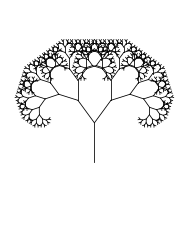

In [15]:
draw_init()
frame = make_frame(make_vect(0, 0),make_vect(1, 0),make_vect(0, 1))
transform_painter(tree(8),
                  make_vect(0.0, 0.0),
                  make_vect(1.0, 0.0),
                  make_vect(0.0, 1.0))(frame)

## シェルピンスキーのギャスケット

##### a. 線分 [(x0,y0), (x1,y1)] の分割する座標を求める
$$
\left[\begin{array}{c}
    xx_0 \\
    yy_0
\end{array}\right]
=
\left[\begin{array}{c}
    x_0  + x_1 \\
    y_0  + y_1
\end{array}\right]
*
\frac{1}{2}
$$

##### b. 線分 [(x1,y1), (x2,y2)] の分割する座標を求める
$$
\left[\begin{array}{c}
    xx_1 \\
    yy_1
\end{array}\right]
=
\left[\begin{array}{c}
    x_1  + x_2 \\
    y_1  + y_2
\end{array}\right]
*
\frac{1}{2}
$$

##### c. 線分 [(x2,y2), (x0,y0)] の分割する座標を求める
$$
\left[\begin{array}{c}
    xx_2 \\
    yy_2
\end{array}\right]
=
\left[\begin{array}{c}
    x_2  + x_0 \\
    y_2  + y_0
\end{array}\right]
*
\frac{1}{2}
$$



In [16]:
def sierpinski(n):
    def _lambda(frame):
        m =  frame_coord_map(frame)

        def sierpinski_iter(v0, v1, v2, c):
            if c > 1:
                vv0 = scale_vect(1/2, add_vect(v0, v1))
                vv1 = scale_vect(1/2, add_vect(v1, v2))
                vv2 = scale_vect(1/2, add_vect(v2, v0))

                sierpinski_iter(v0, vv0, vv2, c-1)
                sierpinski_iter(v1, vv0, vv1, c-1)
                sierpinski_iter(v2, vv2, vv1, c-1)
            else:
                draw_line(m(v0), m(v1))
                draw_line(m(v1), m(v2))
                draw_line(m(v2), m(v0))        
        sierpinski_iter(
                     make_vect(0.44428969359331477, 0.07168458781362007),
                     make_vect(0.04178272980501393, 0.7706093189964157),
                     make_vect(0.8481894150417827, 0.7706093189964157), n)
    return _lambda

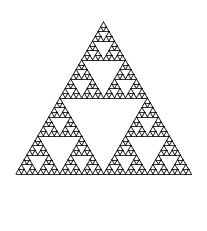

In [17]:
draw_init()
frame = make_frame(make_vect(0, 0),make_vect(1, 0),make_vect(0, 1))
transform_painter(sierpinski(6),
                  make_vect(0.0, 0.0),
                  make_vect(1.0, 0.0),
                  make_vect(0.0, 1.0))(frame)